# Machine Learning Workflow

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# ETL
- Extract raw data
- Transform the raw data into clean data
- Load the data into a target(database, ML, model, etc)

In [2]:
sns.get_dataset_names()

/Users/anielkaaslan/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file /Users/anielkaaslan/anaconda3/lib/python3.7/site-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('titanic')

In [4]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
df.dropna(subset = ['age'], inplace = True) #only dropping when there is a null in age column

# Outliers
- Observation that is unlike the others obvservations
- Standard deviation can be ised to identify outliers in Gaussian or Gaussian-like data
- Interquartile range can be used to identify outliers in data regardless of the distribution

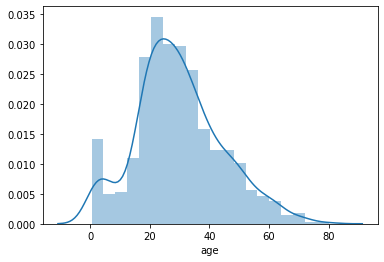

In [6]:
sns.distplot(df['age'])

# .skew()
- skew == 0 indicates symmetrical distribution
- skew < 0 indicates tail is larger towards the left side
- 0 < skew indicates tail is larger towards the right side

In [7]:
df['age'].skew()

0.38910778230082693

# Shapiro-Wilk test
- Returns p-value
- H0 is that data came from a normally distributed population

In [8]:
from scipy.stats import shapiro

shapiro(df['age'])[1] # Is this a normal distribution? it is not due to its low value

7.322165629375377e-08

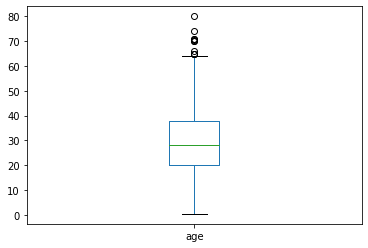

In [9]:
df['age'].plot(kind = 'box')

-6.6875 64.8125


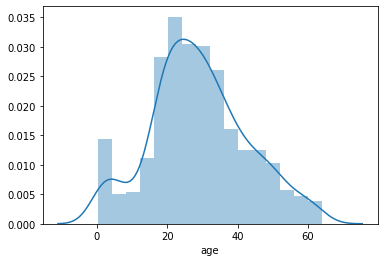

In [10]:
def interquartile(df, col, k = 1.5):
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    cutoff = (q3 - q1) * k
    lower_fence = q1 - cutoff
    upper_fence = q3 + cutoff
    print(lower_fence, upper_fence)
    return df.query(f"{lower_fence} < age < {upper_fence}")

iqr = interquartile(df, 'age')

sns.distplot(iqr['age'])

# Normalization
- Scalling all variables so that they take values from the same range
- Typically this range is [0, 1]
- Done to minimize the effects of bias (sampling or measurement errors)

MinMaxScaler
- .min() == 0
- .max() == 1
- Argument must be 2D numpy array

In [12]:
iqr['age'].values[:5]

array([22., 38., 26., 35., 35.])

In [13]:
np.random.rand(5, 1)

array([[0.02998225],
       [0.05030656],
       [0.59338981],
       [0.07572175],
       [0.47689585]])

In [14]:
iqr['age'].values.reshape(-1, 1)[:5] 
# -1 tells pandas to infer the value from the lenght of the series

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.]])

In [15]:
from sklearn.preprocessing import MinMaxScaler

rescaled = MinMaxScaler().fit_transform(iqr['age'].values.reshape(-1, 1))
rescaled[:5]

array([[0.33941491],
       [0.59106637],
       [0.40232778],
       [0.54388172],
       [0.54388172]])

In [16]:
pd.Series(rescaled.ravel()) #to flatten and return to df

0      0.339415
1      0.591066
2      0.402328
3      0.543882
4      0.543882
5      0.842718
6      0.024851
7      0.418056
8      0.213589
9      0.056307
10     0.905631
11     0.307958
12     0.606795
13     0.213589
14     0.858446
15     0.024851
16     0.480969
17     0.543882
18     0.528154
19     0.229317
20     0.433784
21     0.119220
22     0.591066
23     0.292230
24     0.622523
25     0.433784
26     0.653979
27     0.323687
28     0.276502
29     0.213589
         ...   
673    0.701164
674    0.795533
675    0.370871
676    0.638251
677    0.323687
678    0.748349
679    0.370871
680    0.653979
681    0.418056
682    0.480969
683    0.056307
684    0.402328
685    0.732620
686    0.512425
687    0.732620
688    0.433784
689    0.229317
690    0.307958
691    0.292230
692    0.874174
693    0.386600
694    0.512425
695    0.339415
696    0.433784
697    0.386600
698    0.606795
699    0.418056
700    0.292230
701    0.402328
702    0.496697
Length: 703, dtype: floa

# Review: round()


In [17]:
iqr['fare'].head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: fare, dtype: float64

In [18]:
iqr['fare'].apply(round).head()

0     7
1    71
2     8
3    53
4     8
Name: fare, dtype: int64

In [19]:
iqr['fare'].apply(lambda x: round(x, 2)).head()

0     7.25
1    71.28
2     7.92
3    53.10
4     8.05
Name: fare, dtype: float64

Review pd.get_dummies()
- One-Hot Encoding

In [20]:
pd.get_dummies(iqr['sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


Review .sample()

In [21]:
shuffled = iqr.sample(frac = 1) # frac == fraction of rows to randomly sample
shuffled.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
281,0,3,male,28.0,0,0,7.8542,S,Third,man,True,NaN,Southampton,no,True
401,0,3,male,26.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
581,1,1,female,39.0,1,1,110.8833,C,First,woman,False,C,Cherbourg,yes,False
580,1,2,female,25.0,1,1,30.0000,S,Second,woman,False,NaN,Southampton,yes,False
810,0,3,male,26.0,0,0,7.8875,S,Third,man,True,NaN,Southampton,no,True


Review train_test_split()

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iqr[['age', 'sex']], #features
    iqr['survived'], #target
    test_size = .2
)

X_train.head()

,age,sex
554,22.0,female
422,29.0,male
372,19.0,male
634,9.0,female
66,29.0,female


In [25]:
y_train.head()

554    1
422    0
372    0
634    0
66     1
Name: survived, dtype: int64